In [2]:
import torch
import numpy as np
#import scipy.io
import argparse
from pinn.neural_net import MLP
from pinn.get_points import normalize
from pinn.util import log
from pathlib import Path
import matplotlib.pyplot as plt
from pinn.evaluate import get_pars, evaluate, load_data, get_residuals, get_loss
from matplotlib.backends.backend_pdf import PdfPages
import glob

In [3]:
model_path = 'models/model_nf10000_nb1000_ns0_fn1-0-0_fs0-1-1_MLPRes_2x2x20_shuffle1_seed1_adam_lr0.001_loss_l1'
pars = get_pars(model_path)

FileNotFoundError: [Errno 2] No such file or directory: 'model_nf10000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle1.pt'

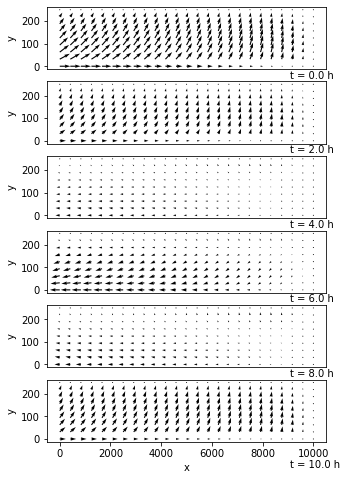

In [ ]:

nt = 6
nx = 25
ny = 9

t = np.linspace(0,pars['tf']*(nt-1)/nt,nt)
x = np.linspace(pars['xi'],pars['xf'],nx)
y = np.linspace(0,pars['yf'],ny)

[e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)

#pp = PdfPages('A.pdf')

plt.subplots(nt,1,figsize=(5, 8))

for i in range(0,nt):
    plt.subplot(nt,1,i+1)
    plt.quiver(x_grid[i,:,:], y_grid[i,:,:], u_pred[i,:,:], 100*v_pred[i,:,:], scale=3)
    plt.gca().set_ylabel('y')
    if i < nt-1:
        plt.gca().get_xaxis().set_visible(False)
        plt.figtext(0.8,0.756-0.1295*i,f't = {t[i]/3600} h')
    else:
        plt.gca().set_xlabel('x')
        plt.figtext(0.8,0.08,f't = {t[i]/3600} h')
    #plt.streamplot(x, y, u_pred[i,:,:].squeeze(), 100*v_pred[i,:,:].squeeze())

#plt.show()
#pp.savefig()
#pp.close()

#plt.savefig('Velocity_fields.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
nfs = [10000, 100000]

nt = 2
nx = 8
ny = 51

t = np.linspace(0,pars['tf']*(nt-1)/nt,nt)
x = np.linspace(pars['xi'],pars['xf']*(nx-1)/nx,nx)
y = np.linspace(0,pars['yf'],ny)

Up = np.zeros((ny,nx,nt,len(nfs),2))

for i in range(0,len(nfs)):
    for j in [0,1]:
        m = f'model_nf{nfs[i]}_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle{j}.pt'
        [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,m)
        Up[:,:,:,i,j] = np.transpose(u_pred,(2,1,0))

#pp = PdfPages('A.pdf')

plt.subplots(nt,1,figsize=(10, 3))

u_scale = 10000

colors = ['blue','red']
styles = ['solid','dashed']

plt.subplot(nt,1,1+i)

plt.gca().set_ylabel(r'$\bar{U}$')
for j in range(0,nx):
    plt.plot(t,e_pred[:,j],color=colors[j],linestyle=styles[j],label=f'X={x[j]}')
plt.gca().set_xlim(0, pars['tf'])

plt.legend()
#plt.gca().set_xlabel('Time')
plt.gca().get_xaxis().set_visible(False)
#plt.show()
#pp.savefig()
#pp.close()

#plt.savefig('Velocity_profiles.pdf', bbox_inches='tight', pad_inches=0)

NameError: name 'np' is not defined

In [ ]:
cases = sorted([f for f in glob.glob("time_measures/*fn1-0-0*.pt")])

for case in cases:
    m = torch.load(case)
    print(f'{case} -> {m["time"]/1000}s per iteration')

time_measures/model_nf100000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle0_seed10.pt -> 0.5625852847099304s per iteration
time_measures/model_nf100000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle1_seed10.pt -> 0.5625374341011047s per iteration
time_measures/model_nf10000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle0_seed10.pt -> 0.3576896069049835s per iteration
time_measures/model_nf10000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle1_seed10.pt -> 0.3570123229026794s per iteration
time_measures/model_nf1000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle0_seed10.pt -> 0.37397168469429015s per iteration
time_measures/model_nf1000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle1_seed10.pt -> 0.3449475438594818s per iteration
time_measures/model_nf30000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle0_seed10.pt -> 0.3602532935142517s per iteration
time_measures/model_nf30000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle1_seed10.pt -> 0.36216974210739133s per iteration
time_measures/model_nf3000_nb1000_ns0_fn1-0-0_fs0-1-1_shuffle0_seed10.pt -> 0.34872960996627805s per iteration

(0.0, 43200.0)

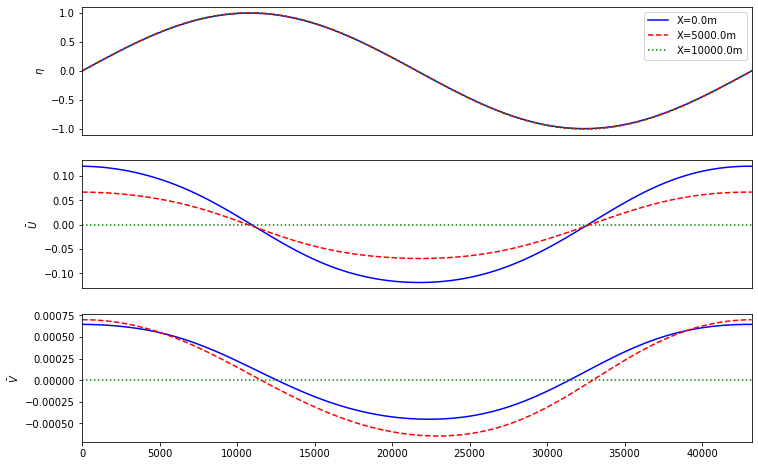

In [21]:
model_path = 'models_tucano/model_nf10000_nb1000_ns0_fn1-0-0_fs0-1-1_MLPRes_2x2x20_shuffle1_seed1_adam_lr0.001_loss_l1.pt'
pars = get_pars(model_path)

nt = 101
nx = 3
y = [0, 100]

# Define grid
t = np.linspace(0.,pars['tf'],nt)
x = np.linspace(0.,pars['xf'],nx)
y = np.array(y)

[e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)  

fig, ax = plt.subplots(figsize=(12, 8))
#ax.plot(t, e_pred.reshape(nt))

colors = ['blue','red','green']
styles = ['solid','dashed','dotted']

plt.subplot(3,1,1)

plt.gca().set_ylabel(r'$\eta$')
for j in range(0,nx):
    plt.plot(t,e_pred[:,j,0],color=colors[j],linestyle=styles[j],label=f'X={x[j]}m')
plt.gca().set_xlim(0,pars['tf'])
plt.legend()

plt.subplot(3,1,2)

plt.gca().set_ylabel(r'$\bar{U}$')
for j in range(0,nx):
    plt.plot(t,u_pred[:,j,0],color=colors[j],linestyle=styles[j],label=f'X={x[j]}m')
plt.gca().set_xlim(0,pars['tf'])
#plt.legend()

plt.subplot(3,1,3)

plt.gca().set_ylabel(r'$\bar{V}$')
for j in range(0,nx):
    plt.plot(t,v_pred[:,j,1],color=colors[j],linestyle=styles[j],label=f'X={x[j]}m')
plt.gca().set_xlim(0,pars['tf'])
#plt.legend()